# Hey!
Like of linear regression, here too logistic has a couple of flavours.

### Intuation:
    Basically logistic regression is used for Binary Classification. It is as easy to understand as the liner regression is.
    There are some things to keep in mind but first let's see the types:
    
1. **Simple Logistic Regression** → Used for Binary Classification
2. **Multinomial Logistic Regression** → Used for 3 or more classes UNORDERED
3. **Ordinal Logistic Regression** → Used for 3 or more classes ORDERED

### How:
    
    There is all theory on how it works. But here I will give a little info.
    
 - Logistic Reg works on the logistic (sigmoid) function. Which transforms any value to 0 to 1
 - Logistic Reg is a linear function with a linear formula **BUT** unlike LR the values are not directly accessible.
 - Value returned by a linear formula has to be converted to 0 to 1 by NON-LINEAR formula.
 - There are multiple ways to search for coefficients $ \beta_0, \beta_1, \beta_n $
     - Maximum Likelyhood
     - Quasi-Newton method
     - Gredient Descent
 - Gredient Descent is (again) easy to implement so we will use it here.

— <br>Let's get it done.

# 

# 

### BASIC REGRESSION MODEL

# $$ \text{output} = \beta_0 + \beta_1X_1 + \beta_2X_2 $$

### LOGISTIC PART

# $$ p(class) = \frac {1} {1 + e^\text{-output}} $$

### THIS ALL BECOMES 

# $$ p(class) = \frac {1} {1 + e^{-\beta_0 + \beta_1X_1 + \beta_2X_2}} $$

Seems so simple!

# 

____

### UPDATE WEIGHTS 

###### 

#### Formulae to update <u>coef</u> 

### $$ w = w + LearningRate \times (y_i - prediction) \times \hat y_i \times (1 - prediction) \times x_i $$

#### Formulae to update <u>intercept</u> 

### $$ w = w + LearningRate \times (y_i - prediction) \times \hat y_i \times (1 - prediction) $$

____

# 

As we are going to use the **SGD** to search for the coefs, let's check the steps:
1. **Set** the B0, B1, Bn = 0
2. **Plug** those values **in the equation** and get the prediction of a prime class
3. Get the **new** value of **B0** by a function
4. Plug the feature values (B1, B2, Bn) for n times in another equation to get new values of B1, B2, Bn
5. **Repeat** steps *2nd to 4th* till the end of data
6. **Repeat** the steps *2nd to 5th* for the desired epochs
7. Done!

# 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Using the book values

In [2]:
x1 = [2.78, 1.46, 3.36, 1.38, 3.06, 7.62, 5.33, 6.922,  8.67,  7.67]
x2 = [2.55, 2.36,  4.4, 1.85,  3.0,  2.7,  2.08, 1.77, -0.24,   3.5]
y =  [0   ,    0,    0,    0,    0,    1,     1,    1,     1,     1]

In [3]:
data = pd.DataFrame({"x1": x1, "x2":x2, "y":y})
data

,x1,x2,y
0,2.780,2.55,0
1,1.460,2.36,0
2,3.360,4.40,0
3,1.380,1.85,0
4,3.060,3.00,0
5,7.620,2.70,1
6,5.330,2.08,1
7,6.922,1.77,1
8,8.670,-0.24,1
9,7.670,3.50,1


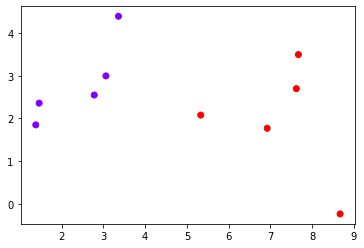

In [5]:
plt.scatter(data.x1, data.x2, c=y, cmap="rainbow")

## 

In [44]:
# Initialize the values
B0 = B1 = B2 = 0.0

In [45]:
# Making a model
def model(xi1, xi2):
    return 1 / (1 + np.exp(-(B0 + (B1 * xi1) + (B2 * xi2))))

In [46]:
# Plug the values
LearningRate = 0.3

for epoch in range(10):
    for xi1, xi2, yi in data.values:
        prediction = model(xi1, xi2)
        B0 = B0 + LearningRate * (yi - prediction) * prediction * (1 - prediction)
        B1 = B1 + LearningRate * (yi - prediction) * prediction * (1 - prediction) * xi1
        B2 = B2 + LearningRate * (yi - prediction) * prediction * (1 - prediction) * xi2

In [47]:
B0, B1, B2

(-0.40309846604104965, 0.8509623907351939, -1.1067556419101996)

Correct.

# 

Now, once after each epoch, we can check the accuracy. 
### Accuracy

# $$ accuracy = \frac {\text{Correct Preds}} {\text{Total Values}} \times 100 $$ 

In [48]:
preds = []
for xi1, xi2 in data[["x1", "x2"]].values:
    preds.append(model(xi1, xi2))

In [49]:
data["pred"] = preds

In [50]:
data

,x1,x2,y,pred
0,2.780,2.55,0,0.297412
1,1.460,2.36,0,0.145215
2,3.360,4.40,0,0.082142
3,1.380,1.85,0,0.218186
4,3.060,3.00,0,0.246119
5,7.620,2.70,1,0.956603
6,5.330,2.08,1,0.861819
7,6.922,1.77,1,0.971483
8,8.670,-0.24,1,0.999283
9,7.670,3.50,1,0.904662


### Filter
```python
if (prediction) > 0.5: 
    return 1
else:
    return 0
```

In [51]:
def crisp(pred):
    return 1 if pred > 0.5 else 0

In [52]:
pred_labels = []
for pred in data.pred:
    pred_labels.append(crisp(pred))

In [53]:
data["predicted_labels"] = pred_labels

In [54]:
data

,x1,x2,y,pred,predicted_labels
0,2.780,2.55,0,0.297412,0
1,1.460,2.36,0,0.145215,0
2,3.360,4.40,0,0.082142,0
3,1.380,1.85,0,0.218186,0
4,3.060,3.00,0,0.246119,0
5,7.620,2.70,1,0.956603,1
6,5.330,2.08,1,0.861819,1
7,6.922,1.77,1,0.971483,1
8,8.670,-0.24,1,0.999283,1
9,7.670,3.50,1,0.904662,1


### Accuracy

In [55]:
total_right = (data.y == data.predicted_labels).sum()
total_values = data.shape[0]
accuracy = (total_right / total_values) * 100

accuracy

100.0

# 

# Now, let's
Visualize the accuray while learning!

In [61]:
data = pd.DataFrame({"x1": x1, "x2":x2, "y":y})
data

,x1,x2,y
0,2.780,2.55,0
1,1.460,2.36,0
2,3.360,4.40,0
3,1.380,1.85,0
4,3.060,3.00,0
5,7.620,2.70,1
6,5.330,2.08,1
7,6.922,1.77,1
8,8.670,-0.24,1
9,7.670,3.50,1


In [44]:
def model(xi1, xi2):
    return 1 / (1 + np.exp(-(B0 + (B1 * xi1) + (B2 * xi2))))

def crisp(pred):
    return 1 if pred > 0.5 else 0

def get_accuracy(preds):
    total_right = sum(preds)
    total_values = len(preds)
    return (total_right / total_values) * 100

In [45]:
B0 = B1 = B2 = 0.0
LearningRate = 0.3
epochs = 10

accuracies = []
for epoch in range(epochs):
    for xi1, xi2, yi in data.values:
        prediction = model(xi1, xi2)
        B0 = B0 + LearningRate * (yi - prediction) * prediction * (1 - prediction)
        B1 = B1 + LearningRate * (yi - prediction) * prediction * (1 - prediction) * xi1
        B2 = B2 + LearningRate * (yi - prediction) * prediction * (1 - prediction) * xi2
    
    preds = []
    for xi1, xi2, yi in data.values:
        y_hat = model(xi1, xi2)
        preds.append(yi == crisp(y_hat))
        
    accuracies.append(get_accuracy(preds))

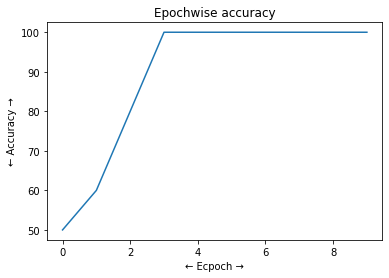

In [46]:
plt.plot(accuracies)
plt.title("Epochwise accuracy")
plt.xlabel("← Ecpoch →")
plt.ylabel("← Accuracy →");

### TO DRAW A DECISION BOUNDRY

# $$ -( \beta_0 + \beta_1 * x ) / \beta_2 $$

In [89]:
def get_x2(x1):
    return -(B0 + B1 * x1) / B2

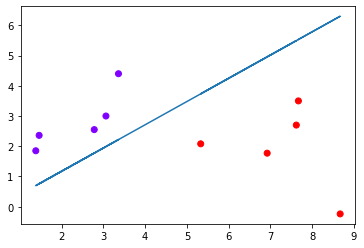

In [100]:
plt.scatter(data.x1, data.x2, c=y, cmap="rainbow")
plt.plot(data.x1, get_x2(data.x1))

### or
*for clarity ↓*

In [97]:
x1_min = data.x1.min()
x1_max = data.x1.max()
x2_min = get_x2(x1_min)
x2_max = get_x2(x1_max)

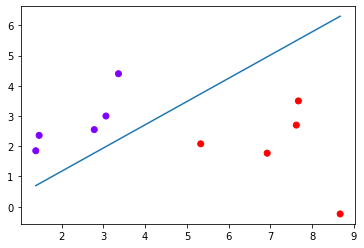

In [99]:
plt.scatter(data.x1, data.x2, c=y, cmap="rainbow")
plt.plot([x1_min, x1_max], [x2_min, x2_max])

# 

## Great! We have made our own Logistic Regression!! 

    Now, I am trying to make a class for LogRegression wich can be called from other
    files as we can in the SLR.

In [286]:
# %%writefile logistic_reg.py
import numpy as np

class LogisticRegression():
    '''
    This is a Logistic Regression from scratch!
    Very easy to use and implement.
    
    Features
    --------
    → It has ability to expand to many features at once. 
      That means, is you can pass n number of features 
      as 2D array and it will work.
      
    → Built in `predict` method that gives predicted labels
    → Built in `accuracies` that will keep track of accuracies
      on each epoch
    → Easy syntax with documentation
    
    How to
    ------
    >>> model = LogisticRegression()
    >>> model.train(epochs=10, learning_rate=0.3)
    >>> model.intercept
    >>> model.coefs
    >>> model.predict(new_x)
    >>> plt.plot(model.accuracies)
    
    Note
    ----
    The model requires data X data in 2D array. Otherwise 
    you will face an error!
    
    '''
    def __init__(self, x, y):
        self.x = np.array(x)
        self.y = np.array(y)
        
        if self.x.ndim  == 1:
            raise ValueError('''Hey! Please insert 2D list / array.
            It's really awkward to work with 1D.
            
            Hint: Use `arr[:, np.newaxis]` to make it 2D if its 1D.''')
        
        if x.shape[0] != len(y):
            raise NotImplementedError(''' Hey! The data length is not matching!!! Kindly match it!''')
        self.intercept = 0.0
        self.coefs = np.zeros(self.x.shape[-1], dtype=np.float32)
    
    def train(self, epochs, learning_rate=0.01):
        self.accuracies = []
        for epoch in range(epochs):
            for X, y in zip(self.x, self.y):
                prediction = self._model(X)
                self.intercept = self.intercept + learning_rate * (y - prediction) * prediction * (1 - prediction)
                for i in range(len(self.coefs)):
                    self.coefs[i] = self.coefs[i] + learning_rate * (y - prediction) * prediction * (1 - prediction) * X[i]

            preds = []
            for X, y in zip(self.x, self.y):
                prediction = self._model(X)
                preds.append(y == self._crisp(prediction))
            self.accuracies.append(self._get_accuracy(preds))
    
    def _model(self, X):
        coefs_add = 0
        for coef, xi in zip(self.coefs, X):
            coefs_add += coef * xi
        return 1 / (1 + np.exp(-(self.intercept + coefs_add)))
    
    def predict(self, new_x):
        new_x = np.array(new_x)
        assert new_x.ndim != 1, "Please insert 2D array"
        assert new_x.shape[-1] == len(self.coefs), "The data is mis-matched."
        labels = []
        for xi in new_x: 
            pred = self._model(xi)
            label = self._crisp(pred)
            labels.append(label)
        return labels
        
    @staticmethod
    def _crisp(pred):
        return 1 if pred > 0.5 else 0
    
    @staticmethod
    def _get_accuracy(preds):
        total_right = sum(preds)
        total_values = len(preds)
        return (total_right / total_values) * 100

In [264]:
model = LogisticRegression(data[["x1", "x2"]], data.y)

In [265]:
model.train(epochs=10, learning_rate=0.3)

In [266]:
model.intercept

-0.40309844410280826

In [267]:
model.coefs

array([ 0.8509623, -1.1067555], dtype=float32)

In [268]:
model.predict(data[["x1", "x2"]])

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

# 

## Checking with another dataset 

In [99]:
from sklearn.datasets import make_blobs

In [237]:
X, y = make_blobs(n_samples=100, n_features=2, cluster_std=2, centers=2)

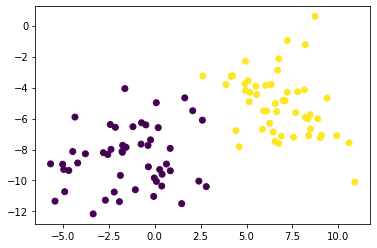

In [269]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [270]:
model = LogisticRegression(X, y)

In [271]:
model.train(epochs=10, learning_rate=0.3)

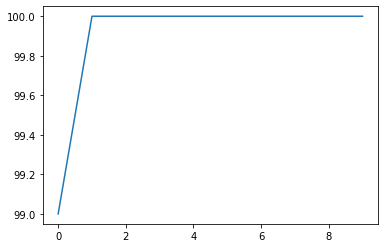

In [272]:
plt.plot(model.accuracies)

In [273]:
model.coefs

array([1.7693759, 0.8232419], dtype=float32)

In [274]:
model.intercept

-0.18693731648249087

In [275]:
a = np.array(model.predict(X))
a

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1])

# 

Trying with sklearn's method

In [276]:
import sklearn.linear_model as lm

In [277]:
model = lm.LogisticRegression()

In [278]:
model.fit(X, y)

LogisticRegression()

In [279]:
model.intercept_

array([-1.21362136])

In [280]:
model.coef_

array([[1.65240953, 0.63323431]])

In [281]:
b = model.predict(X)
b

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1])

In [282]:
a == b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Amazing!!!

## 

# That's it for Logistic Regression!
Next up, we will take a look at new ML algorithm, called: Linear Discriminant Analysis.